# Dataset Information

### Dataset name : healthcare-dataset-stroke-data

LINK : https://www.kaggle.com/datasets/aouatifcherdid/healthcare-dataset-stroke-data

Description : This dataset contains health information about patients, including details like age, gender, and lifestyle habits (e.g., smoking). It also records medical conditions such as hypertension, heart disease, and whether the patient had a stroke. The goal is to help understand which factors might be linked to strokes.

## Data Understanding

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#IMPORTING THE DATA
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
#FIRST 5-ROWS
df.age=df.age.astype('int32')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#LAST 5-ROWS
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
#Slicing
df.loc[100:105]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
100,12363,Male,64,0,1,Yes,Govt_job,Urban,74.10,28.8,Unknown,1
101,63973,Female,77,0,0,Yes,Govt_job,Rural,190.32,31.4,never smoked,1
102,45277,Female,74,0,0,Yes,Private,Rural,231.61,34.6,formerly smoked,1
103,4712,Female,81,0,1,Yes,Self-employed,Rural,78.70,19.4,Unknown,1
104,33175,Female,57,0,0,Yes,Govt_job,Urban,110.52,28.5,Unknown,1
105,2346,Male,58,0,0,Yes,Private,Urban,82.30,NaN,smokes,1


In [ ]:
df.shape   # (rows, columns)

(5110, 12)

In [ ]:
df.info() # column types + missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 459.2+ KB


In [ ]:
df.describe()      # numerical summary stats

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe(include='object')  # categorical summary

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


age_group
Adult     2890
Senior    1304
Child      873
Name: count, dtype: int64



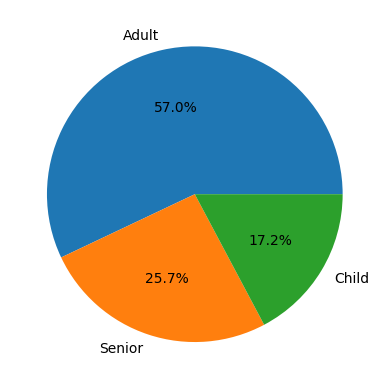

In [ ]:
# Create a new categorical variable, e.g., age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Senior'])

# Check new column
ag = df['age_group'].value_counts()
print(ag)
print()
plt.pie(ag.values,labels=ag.index,autopct='%1.1f%%')
plt.show()

In [ ]:
# Note: No date columns in this dataset, but example if there was a 'date' column
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
df.dtypes          # data types of columns

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.isnull().sum() # count of missing values per column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.notnull().sum()  # count of non-null values

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]  # show rows with missing data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
rows_with_missing = df[df.isnull().any(axis=1)].copy()
rows_with_missing.shape


(201, 12)

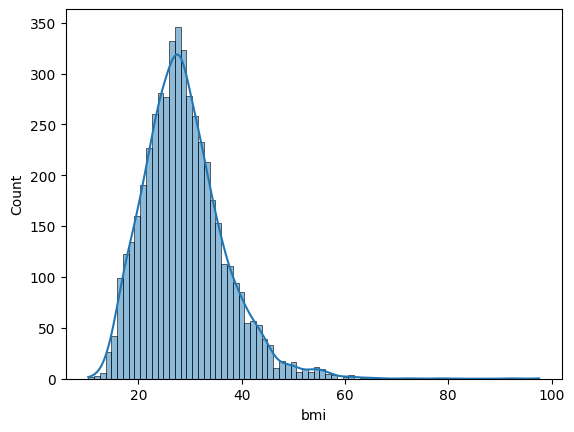

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


In [ ]:
sns.histplot(df['bmi'], kde=True)
plt.show()

print(df['bmi'].describe())


## Data Cleaning

In [ ]:
df['bmi'] = df.groupby('gender')['bmi'].transform(lambda x: x.fillna(x.median()))

In [ ]:
cleaned_rows = df.loc[rows_with_missing.index]

cleaned_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,27.8,Unknown,1
13,8213,Male,78,0,1,Yes,Private,Urban,219.84,28.4,Unknown,1
19,25226,Male,57,0,1,No,Govt_job,Urban,217.08,28.4,Unknown,1
27,61843,Male,58,0,0,Yes,Private,Rural,189.84,28.4,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41,0,0,No,Private,Rural,70.15,28.4,formerly smoked,0
5048,28788,Male,40,0,0,Yes,Private,Urban,191.15,28.4,smokes,0
5093,32235,Female,45,1,0,Yes,Govt_job,Rural,95.02,27.8,smokes,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,28.4,smokes,0


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,27.8,Unknown,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated()]        # show duplicates

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df.drop_duplicates(inplace=True)  # remove duplicates

In [ ]:
df['age'] = df['age'].astype(int) #Converting age into int64 for right dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [ ]:
df['gender'].unique() # unique entries

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df.gender.value_counts() # frequency of each category

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
df=df[df['gender']!='Other']
x=df.gender.value_counts()
print(x)

gender
Female    2994
Male      2115
Name: count, dtype: int64


## Visualization

### Analysis of Bivariable and univariable relations

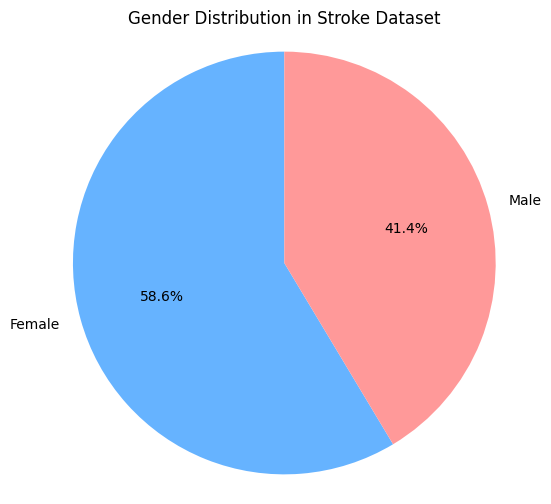

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#c2c2f0'])
plt.title('Gender Distribution in Stroke Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


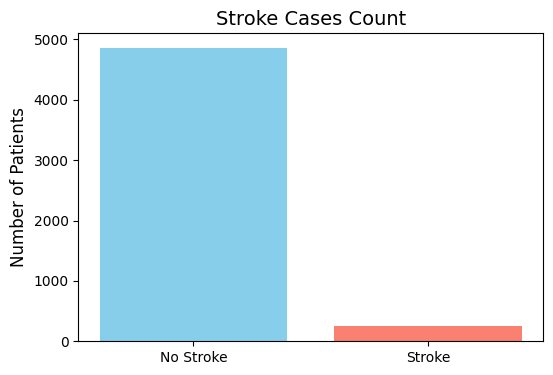

In [ ]:
# Count of stroke vs no-stroke - BAR CHART
stroke_counts = df['stroke'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(
    ['No Stroke','Stroke'],
    stroke_counts.values,
    color=['skyblue','salmon']
)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Stroke Cases Count", fontsize=14)
plt.show()


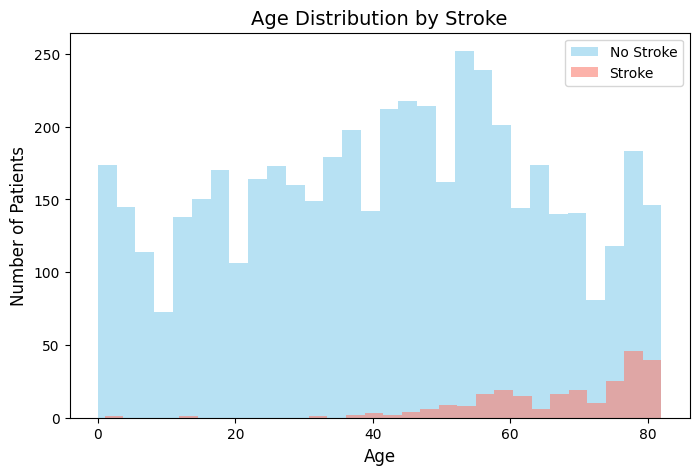

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(
    df[df['stroke']==0]['age'], bins=30, alpha=0.6, label='No Stroke', color='skyblue'
)
plt.hist(
    df[df['stroke']==1]['age'], bins=30, alpha=0.6, label='Stroke', color='salmon'
)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Age Distribution by Stroke", fontsize=14)
plt.legend()
plt.show()


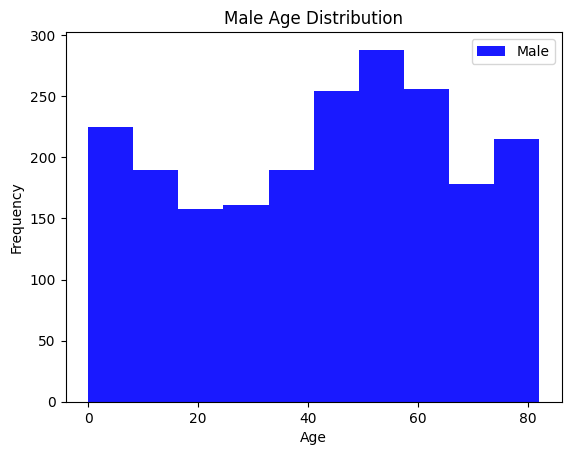

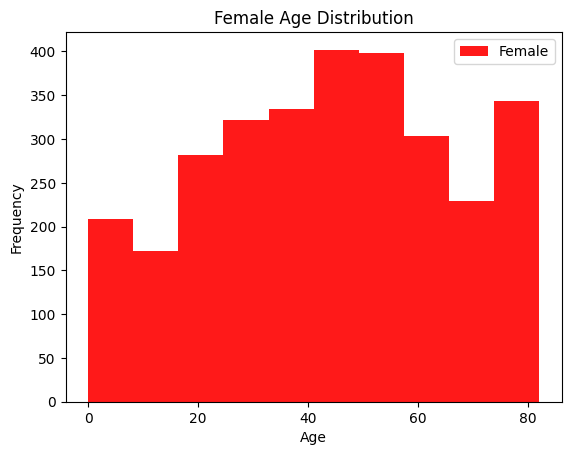

In [ ]:
plt.figure()
plt.hist(df[df['gender'] == 'Male']['age'], bins=10, alpha=0.9, label='Male',color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Male Age Distribution')

plt.show()

plt.figure()
plt.hist(df[df['gender'] == 'Female']['age'], bins=10, alpha=0.9, label='Female',color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Female Age Distribution')

plt.show()

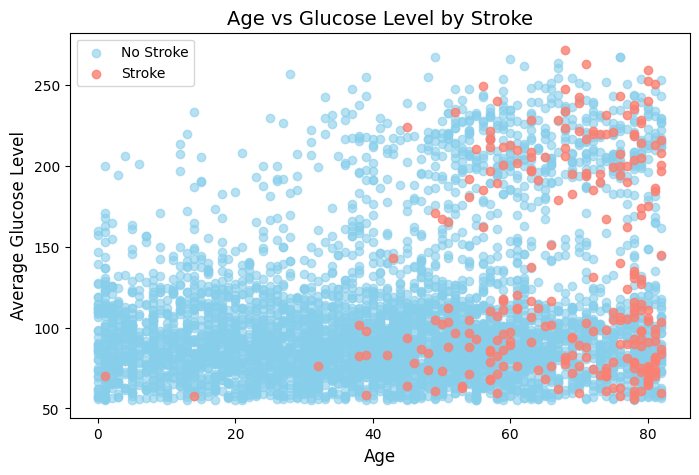

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(
    df[df['stroke']==0]['age'],
    df[df['stroke']==0]['avg_glucose_level'],
    alpha=0.6, label='No Stroke', color='skyblue'
)
plt.scatter(
    df[df['stroke']==1]['age'],
    df[df['stroke']==1]['avg_glucose_level'],
    alpha=0.8, label='Stroke', color='salmon'
)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Glucose Level", fontsize=12)
plt.title("Age vs Glucose Level by Stroke", fontsize=14)
plt.legend()
plt.show()


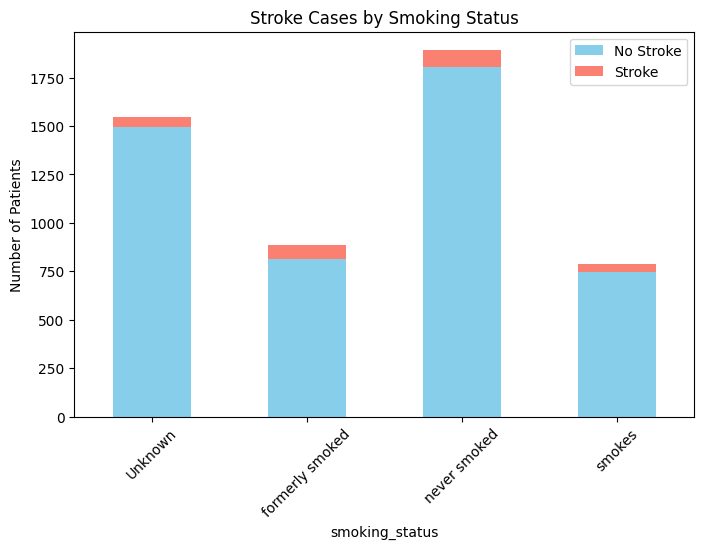

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

smoke_stroke = pd.crosstab(df['smoking_status'], df['stroke'])

smoke_stroke.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue','salmon'])
plt.ylabel("Number of Patients")
plt.title("Stroke Cases by Smoking Status")
plt.xticks(rotation=45)
plt.legend(["No Stroke","Stroke"])
plt.show()


## Data Analysis

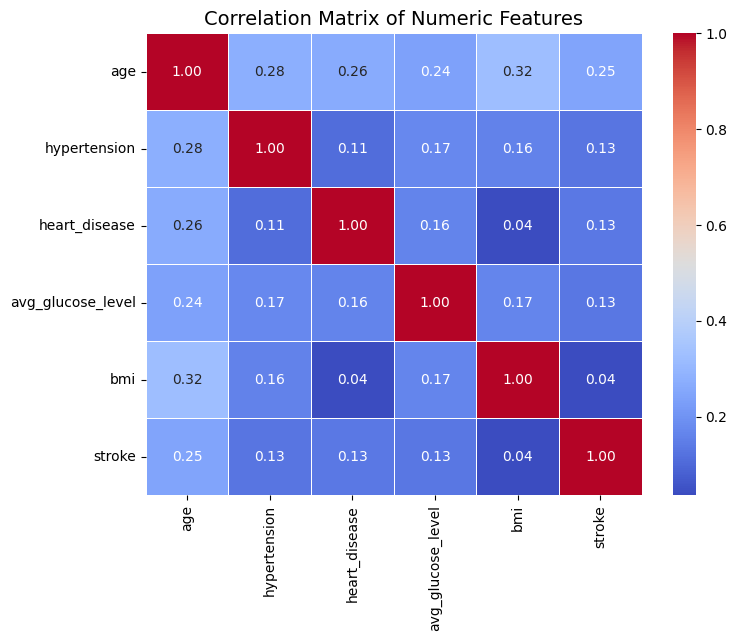

In [ ]:
# Select numeric columns
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,            # show correlation values
    fmt=".2f",             # 2 decimal places
    cmap="coolwarm",       # color map
    cbar=True,             # color bar
    linewidths=0.5         # lines between cells
)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()


## Data Prediction

### RANDOME FOREST MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61,0,0,1,3,0,202.21,27.8,2,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
# Define features and target
X = df.drop(columns=['stroke', 'id'])
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.94


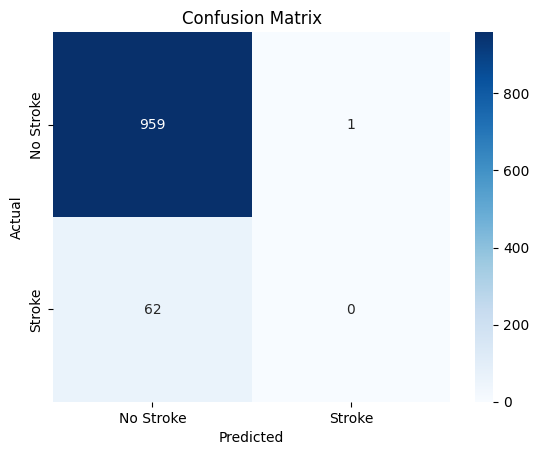

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


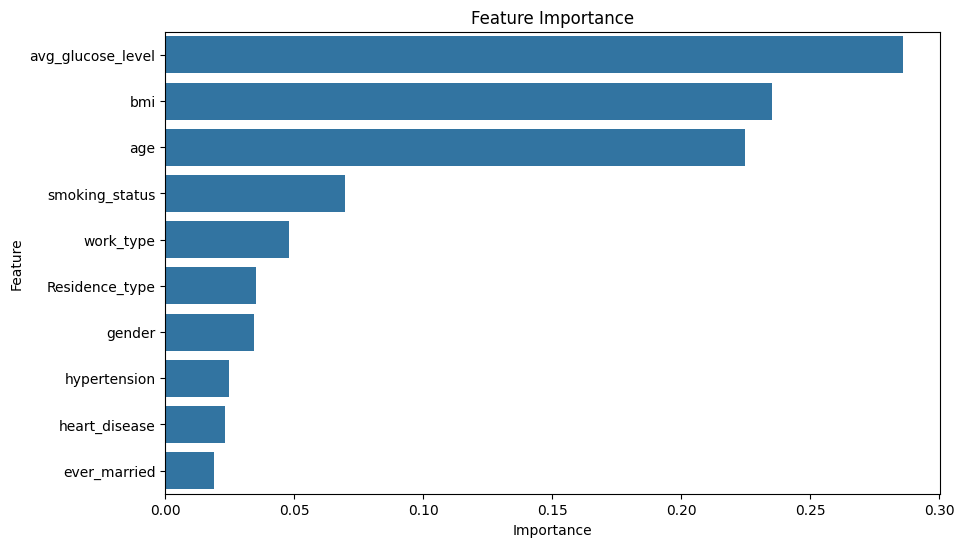

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
# Example new sample
new_sample = {
    'gender': 1,
    'age': 67,
    'hypertension': 0,
    'heart_disease': 1,
    'ever_married': 1,
    'work_type': 2,
    'Residence_type': 1,
    'avg_glucose_level': 228.69,
    'bmi': 36.6,
    'smoking_status': 2
}

# Convert to DataFrame
new_sample_df = pd.DataFrame([new_sample])

# Predict
prediction = rf_model.predict(new_sample_df)
print("Prediction:", "Stroke" if prediction[0] == 1 else "No Stroke")


Prediction: Stroke
